In [1]:
# Notebook setup
import nengo                                # neural network simulation library
from nengo.utils.functions import piecewise # useful for defining a piecewise function of time
import numpy as np                          # a scientific computing library
from matplotlib import pyplot as plt        # a plotting library
from mpl_toolkits.mplot3d import Axes3D     # necessary for generating 3D plots
plt.rcParams['axes.labelsize'] = 20         # set default plot axes label font size
plt.rcParams['axes.titlesize'] = 24         # set default plot title font size
plt.rcParams['legend.fontsize'] = 18        # set default plot legend font size
# make plots inline in the notebook instead of creating a new window
%matplotlib inline

# Use this function when asked to compute the RMSE
def compute_rmse(x, y):
    """Computes the root mean-square error"""
    assert np.array_equal(x.shape, y.shape), (
        'x %s and y %s shapes do not match. Fix them before using compute_rmse.' % 
        (str(x.shape), str(y.shape)))
    ret = np.sqrt(np.mean((x-y)**2))
    return ret

# 2) Transformation
In class we discuss how you can find decoders that approximate arbitrary functions of the input. Here we will look at the properties of decoding and transformation. 

## 2.1) Computing nonlinear functions

### 2.1.1) Feedforward computation
Using nengo, build feedforward networks that compute $x^2$, $x^3$, and $\cos(2\pi x)$. For each network:
- Make a plot of the decoded output. Overlay this plot with the stimulus and desired output.
- Report the RMSE.

Your networks should have two `Ensemble`s, and the function should be computed in the `Connection` between them. Although Nengo permits it, do not compute the function in the `Connection` from the input to the first `Ensemble`.

Building finished in 0:00:01.                                                                        
Simulating finished in 0:00:01.                                                                      
Building finished in 0:00:01.                                                                        
Simulating finished in 0:00:01.                                                                      
Building finished in 0:00:01.                                                                        
Simulating finished in 0:00:01.                                                                      
X**2 Network RMSE: 0.050810073792366968
X**3 Network RMSE: 0.057195482323546827
Cos(2piX) Network RMSE: 0.23460437940789872


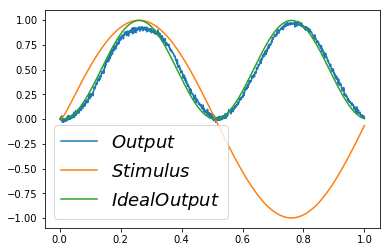

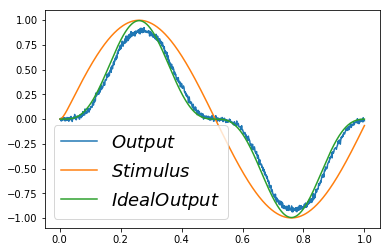

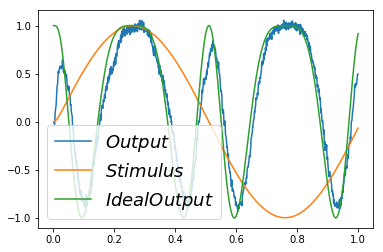

In [16]:
# Use the following in your simulation
T = 1.               # duration of simulation
tau_ens_probe = .01  # Use this as the synapse parameter when creating Probes of Ensembles
in_fun = lambda t: np.sin(2*np.pi*t)  # input function to your network
N = 100  # Number of neurons in each Ensemble
from numpy import pi 

model1 = nengo.Network()
with model1:
    inp = nengo.Node(in_fun)
    ens11 = nengo.Ensemble(n_neurons=N, 
                    dimensions = 1
                    )
    ens12 = nengo.Ensemble(n_neurons=N, 
                dimensions = 1
                )
    
    probe1 = nengo.Probe(ens12, 
                         synapse=tau_ens_probe
                        )
    probe_in = nengo.Probe(inp, synapse=tau_ens_probe)
    nengo.Connection(inp, ens11)
    nengo.Connection(ens11, ens12, function = lambda x: x**2)

model2 = nengo.Network()
with model2:
    inp = nengo.Node(in_fun)
    ens21 = nengo.Ensemble(n_neurons=N, 
                    dimensions = 1
                    )
    ens22 = nengo.Ensemble(n_neurons=N, 
                dimensions = 1
                )

    probe2 = nengo.Probe(ens22, 
                         synapse=tau_ens_probe
                        )
    probe_in = nengo.Probe(inp, synapse=tau_ens_probe)
    nengo.Connection(inp, ens21)
    nengo.Connection(ens21, ens22, function = lambda x: x**3)

model3 = nengo.Network()
with model3:
    inp = nengo.Node(in_fun)
    ens31 = nengo.Ensemble(n_neurons=N, 
                        dimensions = 1
                        )
    ens32 = nengo.Ensemble(n_neurons=N, 
                    dimensions = 1
                    )

    probe3 = nengo.Probe(ens32, 
                         synapse=tau_ens_probe
                        )
    probe_in = nengo.Probe(inp, synapse=tau_ens_probe)
    nengo.Connection(inp, ens31)
    nengo.Connection(ens31, ens32, function = lambda x: np.cos(2*pi*x))

with nengo.Simulator(model1) as sim1: 
    sim1.run(T)

with nengo.Simulator(model2) as sim2: 
    sim2.run(T)

with nengo.Simulator(model3) as sim3: 
    sim3.run(T)
    
plt.figure()
plt.plot(sim1.trange(), sim1.data[probe1], label=r'$Output$')
plt.plot(sim1.trange(), sim3.data[probe_in], label=r'$Stimulus$')
plt.plot(sim1.trange(), sim3.data[probe_in]**2, label=r'$Ideal Output$')
plt.legend(loc='lower left')

RMSE = compute_rmse(sim1.data[probe1], sim3.data[probe_in]**2)
print('X**2 Network RMSE: %r' % RMSE)

plt.figure()
plt.plot(sim2.trange(), sim2.data[probe2], label=r'$Output$')
plt.plot(sim2.trange(), sim3.data[probe_in], label=r'$Stimulus$')
plt.plot(sim2.trange(), sim3.data[probe_in]**3, label=r'$Ideal Output$')
plt.legend(loc='lower left')

RMSE = compute_rmse(sim2.data[probe2], sim3.data[probe_in]**3)
print('X**3 Network RMSE: %r' % RMSE)

plt.figure()
plt.plot(sim3.trange(), sim3.data[probe3], label=r'$Output$')
plt.plot(sim3.trange(), sim3.data[probe_in], label=r'$Stimulus$')
plt.plot(sim3.trange(), np.cos(2*pi*sim3.data[probe_in]), label=r'$Ideal Output$')
plt.legend(loc='lower left')

RMSE = compute_rmse(sim3.data[probe3], np.cos(2*pi*sim3.data[probe_in]))
print('Cos(2piX) Network RMSE: %r' % RMSE)

### 2.1.2) How does the number of neurons affect the decode quality?
For the network computing $x^2$, vary the number of neurons and report how the RMSE varies with number of neurons.
 - Plot number of neurons vs RMSE on a [semilogx](http://matplotlib.org/api/pyplot_api.html?highlight=semilogx#matplotlib.pyplot.semilogx) plot

Building finished in 0:00:01.                                                                        
Simulating finished in 0:00:01.                                                                      
Building finished in 0:00:01.                                                                        
Simulating finished in 0:00:01.                                                                      
Building finished in 0:00:01.                                                                        
Simulating finished in 0:00:01.                                                                      
Building finished in 0:00:01.                                                                        
Simulating finished in 0:00:01.                                                                      
Building finished in 0:00:01.                                                                        
Simulating finished in 0:00:01.                                                   

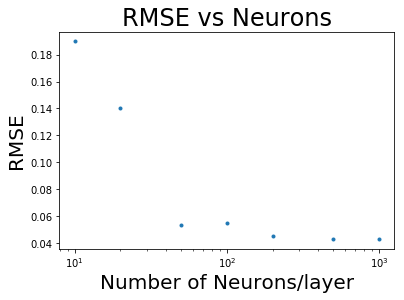

In [22]:
# Use the following in your simulation
T = 1.  # duration of simulation
tau_ens_probe = .01  # Use this as the synapse parameter when creating Probes of Ensembles
in_fun = lambda t: np.sin(2*np.pi*t)  # input function to your network
Ns = [10, 20, 50, 100, 200, 500, 1000]  # Number of neurons in each Ensemble to test

RMSEs = []
for N in Ns: 
    model = nengo.Network()
    with model:
        inp = nengo.Node(in_fun)
        ens1 = nengo.Ensemble(n_neurons=N, 
                        dimensions = 1
                        )
        ens2 = nengo.Ensemble(n_neurons=N, 
                    dimensions = 1
                    )

        probe = nengo.Probe(ens2, 
                             synapse=tau_ens_probe
                            )
        probe_in = nengo.Probe(inp, synapse=tau_ens_probe)
        nengo.Connection(inp, ens1)
        nengo.Connection(ens1, ens2, function = lambda x: x**2)
        
        with nengo.Simulator(model) as sim: 
            sim.run(T)
        RMSE = compute_rmse(sim.data[probe], sim.data[probe_in]**2)
        RMSEs.append(RMSE)

plt.semilogx(Ns, RMSEs, '.')
plt.xlabel('Number of Neurons/layer')
plt.ylabel('RMSE')
plt.title('RMSE vs Neurons')

## 2.2) Network factorization
You'll find that there are multiple ways to build networks that compute the same function. Here we'll build networks that compute

$$x_0x_1+x_2$$

### 2.2.1) Network structure 1
Build a nengo network consisting of a 3D ensemble connected to a 1D ensemble to compute the desired function.
- Make a plot of the input as decoded from the 3D ensemble. Overlay this plot with the actual input.
- Make a plot of the decoded output of the 1D ensemble. Overlay this plot with the desired function output.
- Make a plot of the 1D ensemble decode error (with respect to the desired output) and report the RMSE.

Building finished in 0:00:01.                                                                        
Simulating finished in 0:00:01.                                                                      
RMSE is 0.056485425922863056


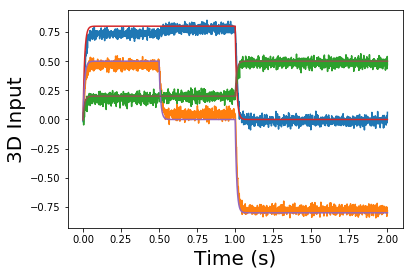

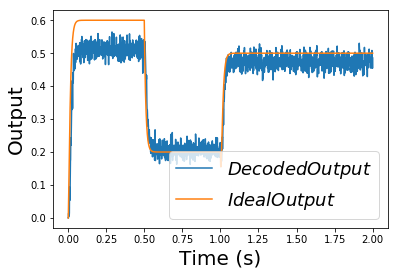

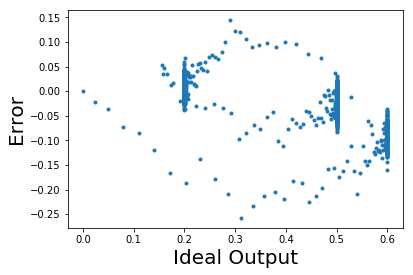

In [46]:
T = 2.  # duration of simulation
tau_ens_probe = .01  # Use this as the synapse parameter when creating Probes of Ensembles
in_fun = piecewise({0.:(.8, .5, .2),
                    .5:(.8, 0., .2), 
                    1.:(0., -.8, .5)})  # input function to your network
N0 = 100  # Number of neurons in the 3D Ensemble
N1 = 100  # Number of neurons in the 1D Ensemble


model = nengo.Network()
with model:
    inp = nengo.Node(in_fun)
    ens1 = nengo.Ensemble(n_neurons=N0, 
                    dimensions = 3
                    )
    ens2 = nengo.Ensemble(n_neurons=N1, 
                dimensions = 1
                )
    
    probe_h = nengo.Probe(ens1, 
                         synapse=tau_ens_probe
                         )
    probe = nengo.Probe(ens2, 
                         synapse=tau_ens_probe
                        )
    probe_in = nengo.Probe(inp, synapse=tau_ens_probe)
    nengo.Connection(inp, ens1)
    nengo.Connection(ens1, ens2, function = lambda x: x[0]*x[1] + x[2])

with nengo.Simulator(model) as sim: 
    sim.run(T)
ideal_output = sim.data[probe_in][:,0]*sim.data[probe_in][:,1] + sim.data[probe_in][:,2]
ideal_output = ideal_output.reshape((-1,1))
error = sim.data[probe] - ideal_output
RMSE = compute_rmse(sim.data[probe], ideal_output)
print('RMSE is %r' % RMSE)

plt.plot(sim.trange(), sim.data[probe_h], label=r'$Decoded Output$')
plt.plot(sim.trange(), sim.data[probe_in], label=r'$Ideal Output$')
plt.xlabel('Time (s)')
plt.ylabel('3D Input')

plt.figure()
plt.plot(sim.trange(), sim.data[probe], label=r'$Decoded Output$')
plt.plot(sim.trange(), ideal_output, label=r'$Ideal Output$')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.legend(loc = 'lower right')

plt.figure()
plt.plot(ideal_output, error, '.')
plt.xlabel('Ideal Output')
plt.ylabel('Error')

### 2.2.2) Network structure 2
Now we'll build a network with a different structure to compute the same desired function. For this network:
- Create a 2D ensemble and a 1D ensemble.
- Connect the first two dimensions of the input to the 2D ensemble. (Hint: Nengo supports slice notation)
- Connect the 2D ensemble to the 1D ensemble and compute $x_0x_1$ in this connection.
- Connect the third dimension of the input to the 1D ensemble.

Make the same plots as in 2.2.1 using this network.

Building finished in 0:00:01.                                                                        
Simulating finished in 0:00:01.                                                                      
RMSE is 0.035775988632243211


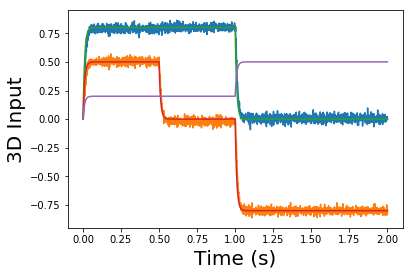

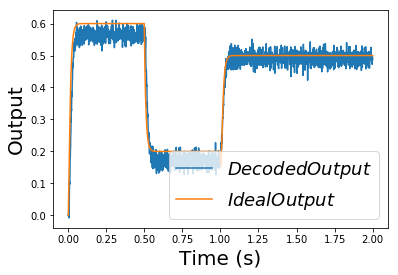

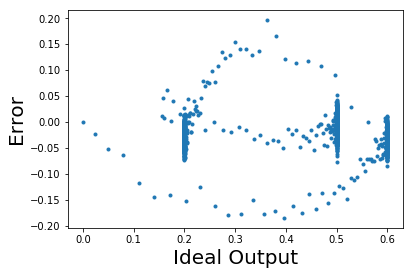

In [50]:
T = 2.  # duration of simulation
tau_ens_probe = .01  # Use this as the synapse parameter when creating Probes of Ensembles
in_fun = piecewise({0.:(.8, .5, .2),
                    .5:(.8, 0., .2), 
                    1.:(0., -.8, .5)})  # input function to your network
N0 = 100  # Number of neurons in the 2D Ensemble
N1 = 100  # Number of neurons in the 1D Ensemble

model = nengo.Network()
with model: 
    ens2D = nengo.Ensemble(n_neurons=N0,
                           dimensions=2)
    ens1D = nengo.Ensemble(n_neurons=N1, 
                          dimensions=1)
    inp = nengo.Node(in_fun)
    nengo.Connection(inp[:2], ens2D)
    nengo.Connection(ens2D, ens1D, function=lambda x: x[0]*x[1])
    nengo.Connection(inp[2], ens1D)
    probe_in = nengo.Probe(inp, synapse=tau_ens_probe)
    probe_h = nengo.Probe(ens2D, synapse=tau_ens_probe)
    probe = nengo.Probe(ens1D, synapse=tau_ens_probe)
    
with nengo.Simulator(model) as sim: 
    sim.run(T)
ideal_output = sim.data[probe_in][:,0]*sim.data[probe_in][:,1] + sim.data[probe_in][:,2]
ideal_output = ideal_output.reshape((-1,1))
error = sim.data[probe] - ideal_output
RMSE = compute_rmse(sim.data[probe], ideal_output)
print('RMSE is %r' % RMSE)

plt.plot(sim.trange(), sim.data[probe_h], label=r'$Decoded Output$')
plt.plot(sim.trange(), sim.data[probe_in], label=r'$Ideal Output$')
plt.xlabel('Time (s)')
plt.ylabel('3D Input')

plt.figure()
plt.plot(sim.trange(), sim.data[probe], label=r'$Decoded Output$')
plt.plot(sim.trange(), ideal_output, label=r'$Ideal Output$')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.legend(loc = 'lower right')

plt.figure()
plt.plot(ideal_output, error, '.')
plt.xlabel('Ideal Output')
plt.ylabel('Error')

### 2.2.3)
The total number of neurons is the same in the networks of 2.2.1 and 2.2.2. 
Explain the difference in performance.

YOUR ANSWER HERE